Saving weather_data.csv to weather_data (1).csv
       date   meantemp   humidity  wind_speed  meanpressure
0  1/1/2013  10.000000  84.500000    0.000000   1015.666667
1  1/2/2013   7.400000  92.000000    2.980000   1017.800000
2  1/3/2013   7.166667  87.000000    4.633333   1018.666667
3  1/4/2013   8.666667  71.333333    1.233333   1017.166667
4  1/5/2013   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     

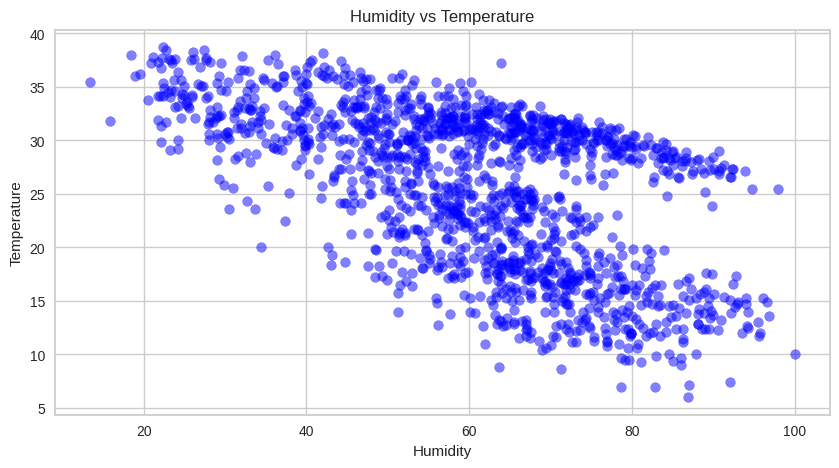

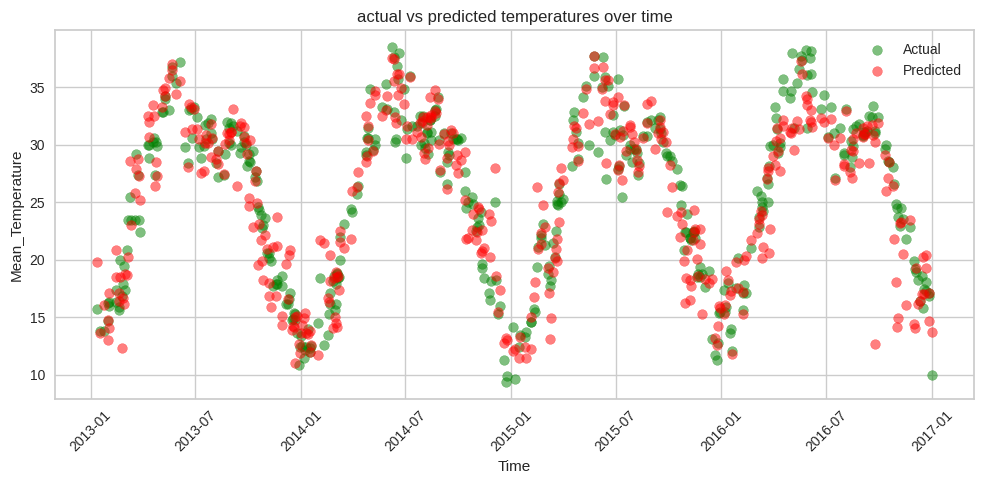

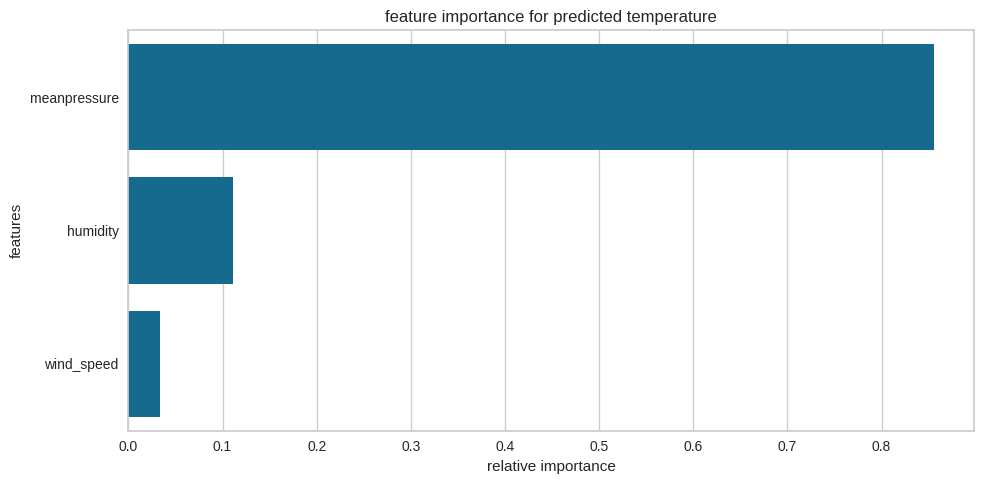

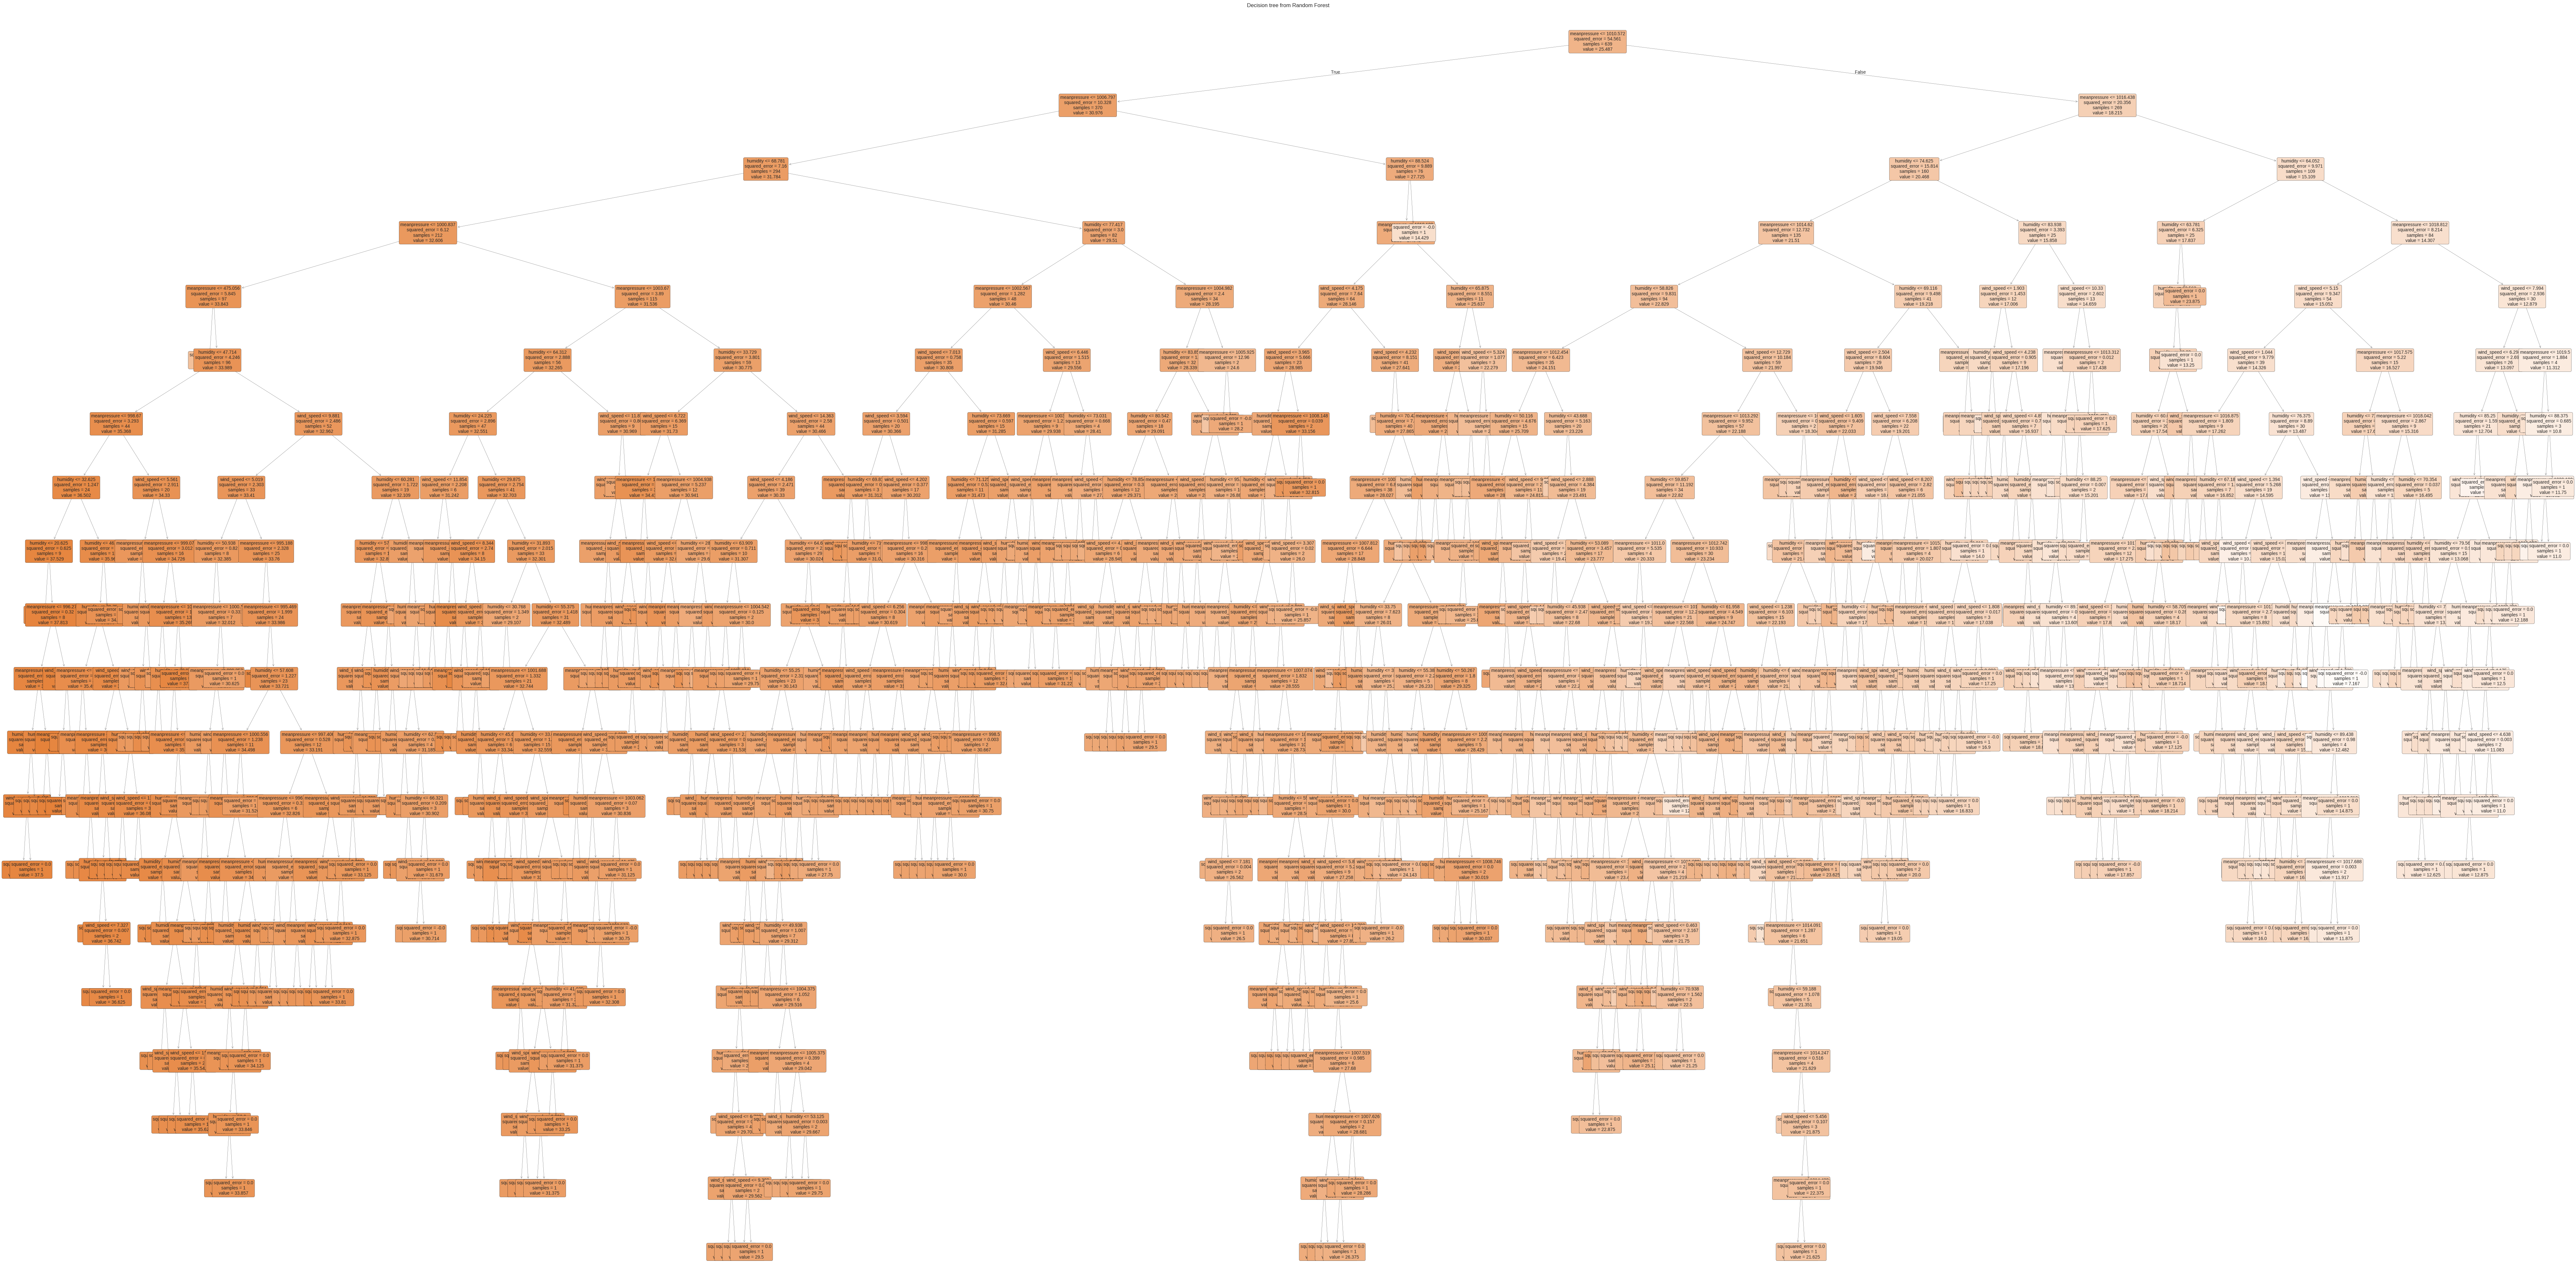

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from yellowbrick.model_selection import feature_importances

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('weather_data.csv')

print(df.head())
print(df.info())
print(df.describe())

# Handle missing data
print("Missing values before fill:")
print(df.isnull().sum())

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').ffill().reset_index()
print("\nMissing values after forward-fill:")
print(df.isnull().sum())

X = df[['wind_speed', 'humidity', 'meanpressure']] #feature matrix
y = df['meantemp'] #response vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #train-test split
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print('Predictions:\n', y_pred) #make predictions

# residual
residuals = y_test - y_pred
print("\nResiduals (first 5):")
print(residuals.head())

comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print('Actual test data vs predicted: \n', comparison_df.head())

# evaluate the model
oob_score = rf_model.oob_score_
r2 = r2_score(y_test, y_pred)

print(f'Out-of-Bag Score: {oob_score}')
print("MSE:", mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print(f'R-squared Score: {r2}')

plt.figure(figsize=(10, 5))
plt.scatter(X['humidity'], y, color='blue', alpha=0.5)
plt.title('Humidity vs Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df['date'].loc[y_test.index], y_test, color='green', label='Actual', alpha=0.5)
plt.scatter(df['date'].loc[y_test.index], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Mean_Temperature')
plt.title('actual vs predicted temperatures over time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('feature importance for predicted temperature')
plt.xlabel('relative importance')
plt.ylabel('features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(80, 40))
tree_to_plot = rf_model.estimators_[7]
plot_tree(tree_to_plot,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision tree from Random Forest")
plt.tight_layout()
plt.show()
